## PROYECTO 13: ESTRATEGIA DE RETENCION DE CLIENTES

La cadena de gimnasios Model Fitness está desarrollando una estrategia de interacción con clientes basada en datos analíticos.

Uno de los problemas más comunes que enfrentan los gimnasios y otros servicios es la pérdida de clientes. ¿Cómo descubres si un/a cliente ya no está contigo? 

En el caso de un gimnasio, tiene sentido decir que un/a cliente se ha ido si no viene durante un mes. Pueden ocurrir excepciones, pero por lo general, si un/a cliente se une, viene varias veces y luego desaparece, es poco probable que regrese.

El objetivo principal es analizar los datos del gimnasio y elaborar una estrategia de retención de clientes.

---

Se cuenta con los siguientes datos:

Model Fitness te aportó archivos CSV que contienen los datos sobre la cancelación de un mes en concreto e información del mes que lo precedía. El dataset incluye los siguientes campos:

* Churn — la cancelación para el mes en cuestión

Campos de dataset actuales: Datos del usuario del mes anterior

* 'gender'.
* 'Near_Location' — si el/la usuario/a vive o trabaja en el vecindario donde se encuentra el gimnasio.
* 'Partner' — si el/la usuario/a trabaja en una compañía asociada (el gimnasio tiene empresas asociadas cuyos empleados obtienen descuentos; en esos casos el gimnasio almacena información sobre los empleadores de los clientes).
* Promo_friends — si el/la usuario/a originalmente se inscribió mediante una oferta “trae a un/a amigo/a” (se utilizó el código promocional de un/a amigo/a cuando pagaron el primer abono).
* 'Phone' — si el/la usuario/a aportó el número de teléfono.
* 'Age'.
* 'Lifetime' — el tiempo (en meses) desde que el/la usuario/a llegó por primera vez al gimnasio.


Datos del registro de visitas y compras y datos sobre el estado actual de la membresía:
* 'Contract_period' — 1 mes, 3 meses, 6 meses o 1 año.
* 'Month_to_end_contract' — los meses que faltan hasta que expire el contrato.
* 'Group_visits' — si el/la usuario/a participa en sesiones grupales.
* 'Avg_class_frequency_total' — frecuencia media de visitas por semana a lo largo de la vida del cliente.
* 'Avg_class_frequency_current_month' — frecuencia media de visitas por semana durante el mes en curso.
* 'Avg_additional_charges_total' — cantidad total de dinero gastado en otros servicios del gimnasio: cafetería, productos deportivos, cosméticos, masajes, etc.

---



#### ETAPAS DEL PROYECTO 
* Etapa 1: Lectura de datos.
* Etapa 2: Análisis exploratorio de datos y preprocesamiento.
* Etapa 3: Construir un modelo para predecir la cancelación de usuarios.
* Etapa 4: Crear clusteres de usuarios. 
* Etapa 5: Recomendaciones y Conclusiones. 

---

### ETAPA 1: Lectura de Datos

In [62]:
#importar las librerias necesarias 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.cluster import KMeans

In [63]:
# Cargar los datos
gym_data = pd.read_csv('gym_churn_us.csv')
gym_data

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,0
4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,1,1,1,0,1,12,0,33,2.406023,12.0,8,2.284497,2.349070,0
3996,0,1,0,0,1,1,1,29,68.883764,1.0,1,1.277168,0.292859,1
3997,1,1,1,1,1,12,0,28,78.250542,11.0,2,2.786146,2.831439,0
3998,0,1,1,1,1,6,0,32,61.912657,5.0,3,1.630108,1.596237,0


### ETAPA 2: Análisis Exploratorio de Datos y Preprocesamiento 

In [64]:
#informacion de los datos
gym_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   gender                             4000 non-null   int64  
 1   Near_Location                      4000 non-null   int64  
 2   Partner                            4000 non-null   int64  
 3   Promo_friends                      4000 non-null   int64  
 4   Phone                              4000 non-null   int64  
 5   Contract_period                    4000 non-null   int64  
 6   Group_visits                       4000 non-null   int64  
 7   Age                                4000 non-null   int64  
 8   Avg_additional_charges_total       4000 non-null   float64
 9   Month_to_end_contract              4000 non-null   float64
 10  Lifetime                           4000 non-null   int64  
 11  Avg_class_frequency_total          4000 non-null   float

In [65]:
#datos nulos
gym_data.isna().sum()

gender                               0
Near_Location                        0
Partner                              0
Promo_friends                        0
Phone                                0
Contract_period                      0
Group_visits                         0
Age                                  0
Avg_additional_charges_total         0
Month_to_end_contract                0
Lifetime                             0
Avg_class_frequency_total            0
Avg_class_frequency_current_month    0
Churn                                0
dtype: int64

In [66]:
#datos duplicados
gym_data.duplicated().sum()

0

Los datos entregados se ven bien, con las clases necesarias para realizar el trabajo. Tampoco se observan datos duplicados o nulos, por lo que la base de datos está lista para ser utilizada.

In [67]:
#primer  vistazo a estadistica básica 
gym_data.describe()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,0.510250,0.845250,0.486750,0.308500,0.903500,4.681250,0.412250,29.184250,146.943728,4.322750,3.724750,1.879020,1.767052,0.265250
std,0.499957,0.361711,0.499887,0.461932,0.295313,4.549706,0.492301,3.258367,96.355602,4.191297,3.749267,0.972245,1.052906,0.441521
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,18.000000,0.148205,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,27.000000,68.868830,1.000000,1.000000,1.180875,0.963003,0.000000
50%,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,29.000000,136.220159,1.000000,3.000000,1.832768,1.719574,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,6.000000,1.000000,31.000000,210.949625,6.000000,5.000000,2.536078,2.510336,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,12.000000,1.000000,41.000000,552.590740,12.000000,31.000000,6.023668,6.146783,1.000000


El primer análisis estadistico básico arroja que la cancelación promedio (churn) es de 26.5% o sea, aproximadamente la cuarta parte de los usuarios cancela en un mes dado. Además, La frecuencia promedio de visitas por semana durante la vida del cliente es 1.88 (Avg_class_frequency_total), y la del mes actual es 1.77 (Avg_class_frequency_current_month).

In [68]:
#veamos los valores promedio para los que cancelan (Churn = 1) y los que no (Churn = 0)
grouped_data = gym_data.groupby('Churn').mean()
grouped_data

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month
Churn,,,,,,,,,,,,,
0,0.510037,0.873086,0.534195,0.353522,0.903709,5.747193,0.464103,29.976523,158.445715,5.283089,4.711807,2.024876,2.027882
1,0.510839,0.768143,0.355325,0.183789,0.902922,1.728558,0.268615,26.989632,115.082899,1.662582,0.990575,1.474995,1.044546


c:\Users\Cata Rivera\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Cata Rivera\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Cata Rivera\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Cata Rivera\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values

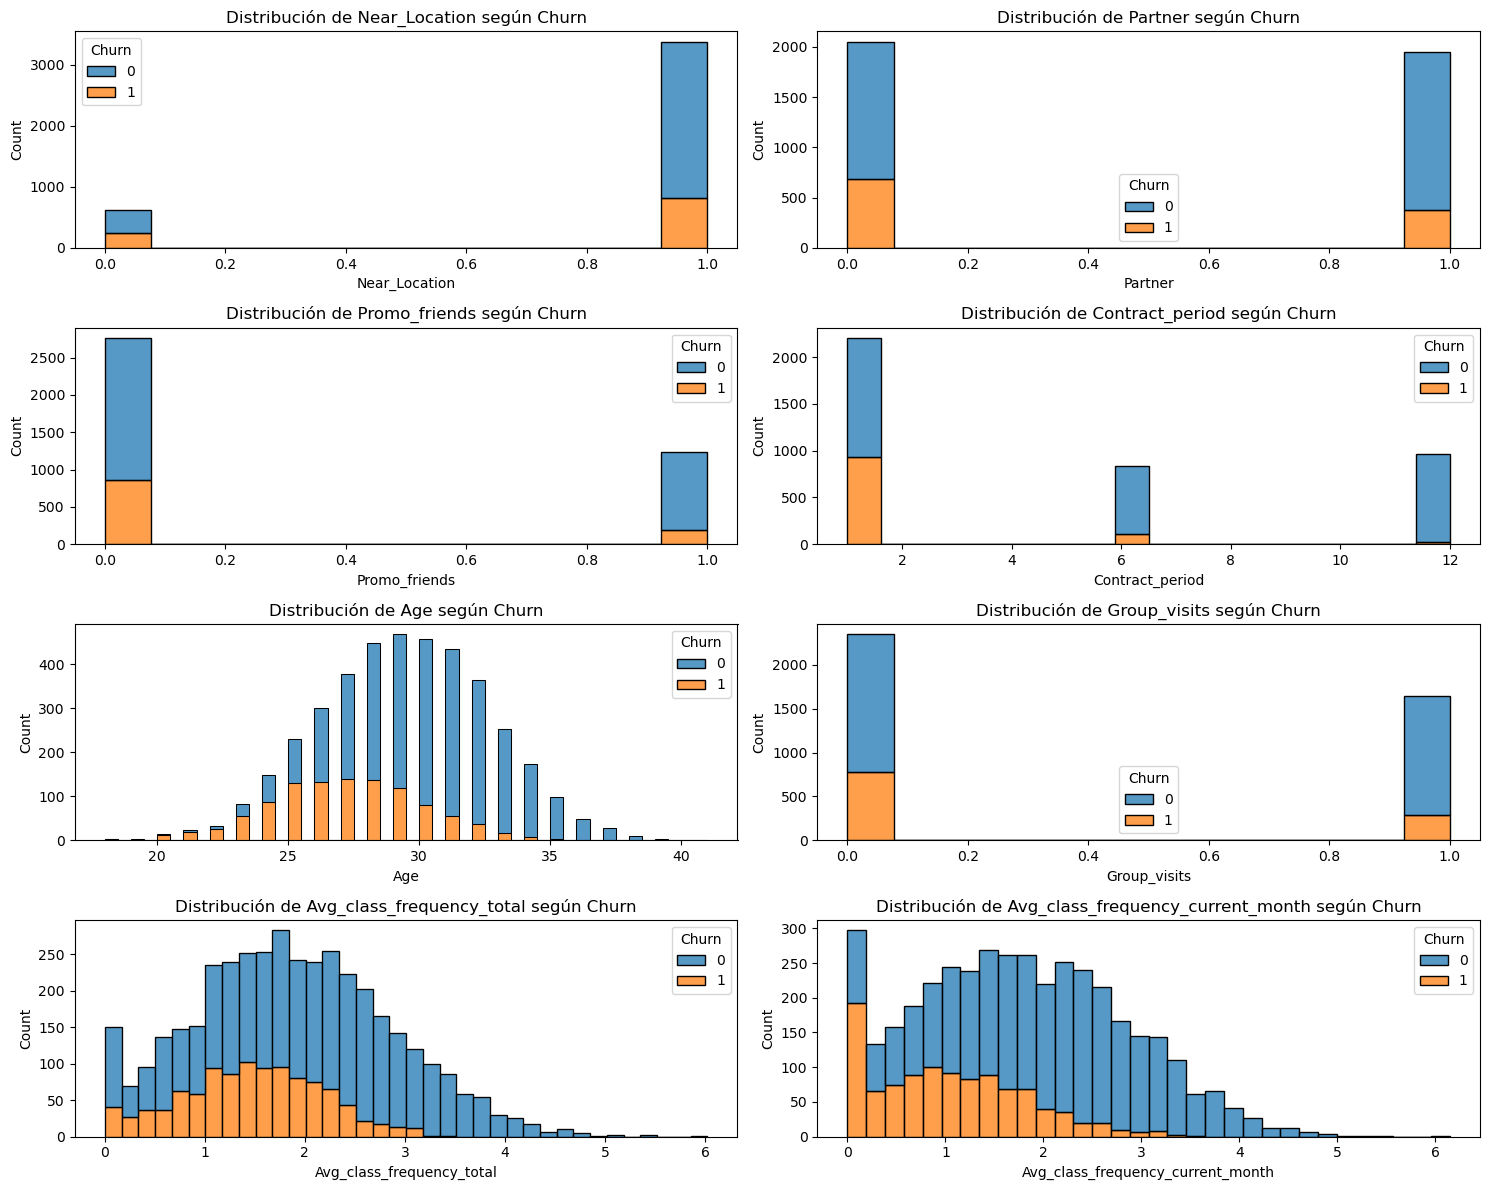

In [69]:
#histogramas y distribucion de caracteristicas con churn
# Definir el tamaño de las gráficas
plt.figure(figsize=(15, 12))

# Crear gráficos para algunas de las características importantes
variables_to_plot = ['Near_Location', 'Partner', 'Promo_friends', 'Contract_period', 'Age', 'Group_visits', 
                     'Avg_class_frequency_total', 'Avg_class_frequency_current_month']

for i, variable in enumerate(variables_to_plot, 1):
    plt.subplot(4, 2, i)
    sns.histplot(data=gym_data, x=variable, hue='Churn', multiple='stack', kde=False)
    plt.title(f'Distribución de {variable} según Churn')

plt.tight_layout()
plt.show()


* Los usuarios que cancelan tienden a vivir o trabajar más lejos del gimnasio (solo el 76.8% viven cerca), mientras que los que se quedan tienen una tasa mayor (87.3%).
* Solo el 35.5% de los usuarios que cancelan trabaja para una empresa asociada, mientras que el 53.4% de los que se quedan lo hace.
* Los usuarios que se inscribieron con la promoción de "trae a un amigo" son menos propensos a cancelar (35.3% permanecen frente a 18.4% de los que cancelan).
* Los usuarios más jóvenes (promedio de 26-27 años) tienden a cancelar más que los mayores (promedio de 29-30 años).
* Los que no cancelan suelen tener contratos más largos (promedio de 5.74 meses frente a 1.73 meses para los que cancelan).
* Los usuarios que participan en clases grupales son menos propensos a cancelar.
* Los clientes que no cancelan tienen una frecuencia de visitas semanal mayor, tanto en promedio general como en el mes actual.

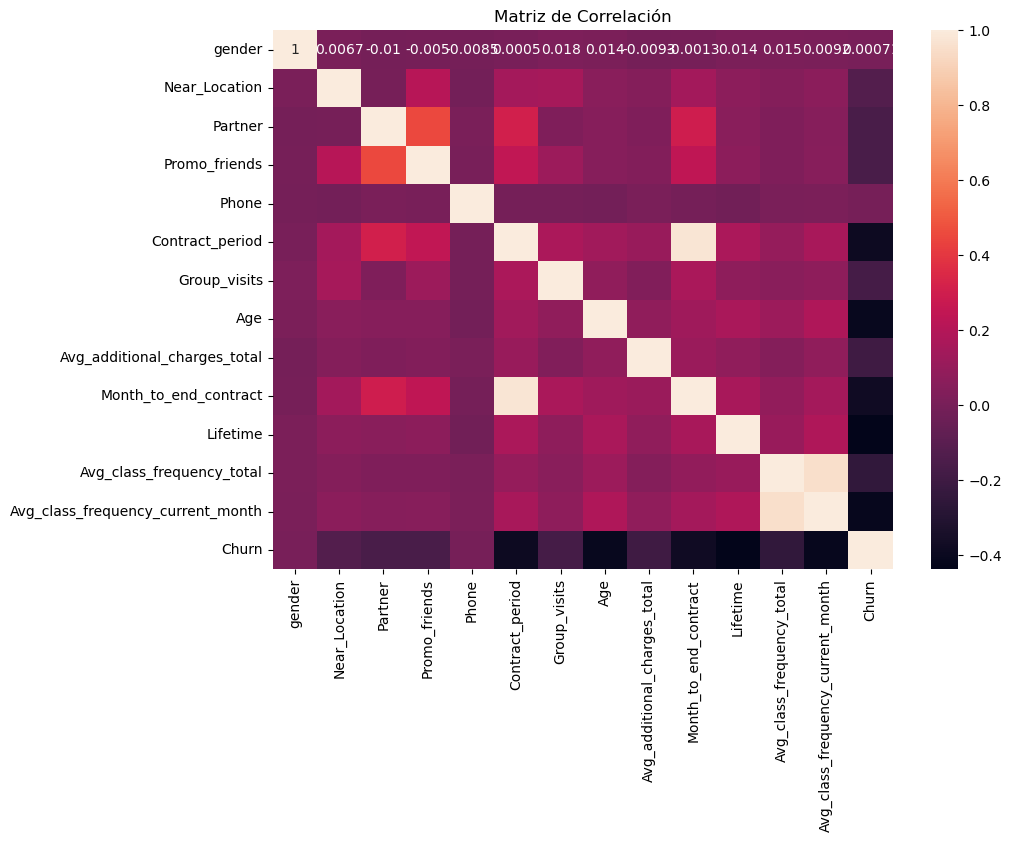

In [70]:
#matriz de correlación
cm = gym_data.corr()

plt.figure(figsize=(10, 7))
sns.heatmap(data=cm, annot=True)
plt.title('Matriz de Correlación')
plt.show()


La matriz de correlación reafirma conclusiones obtenidas en el análisis estadístico básico. 
La variable Churn muestra una correlación fuertemente negativa con variables como Contract_period, Age, Month_to_end_contract, Lifetime, y Avg_class_frequency_current_month. 
Algo que podemos rescatar de esto es que la tasa de cancelación es mayor en periodos de contrato cortos, o sea, las personas que contratan poco tiempo de gimnasio son las que más cancelan. Tambien aquellas que tienen una media baja de visitas semanales o mensuales. Por último, la edad tambien tiene una relación con la tasa de cancelación. 

### ETAPA 3: Construir un Modelo para Predecir la Cancelación de Usuarios

In [71]:
#Preparar los datos para el modelo
#Primero, separaremos las características y la variable objetivo (cancelación).

# Definir características y variable objetivo
X = gym_data.drop(['Churn'], axis=1) #caracteristicas
y = gym_data['Churn'] #variable objetivo

# Dividir los datos en entrenamiento y prueba (80% - 20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Crear el modelo de regresión logística
log_reg = LogisticRegression(random_state=0)
log_reg.fit(X_train, y_train)

# Crear el modelo de bosque aleatorio
rf_clf = RandomForestClassifier(random_state=0)
rf_clf.fit(X_train, y_train)

# Predicciones en el conjunto de prueba
y_pred_log = log_reg.predict(X_test)
y_pred_rf = rf_clf.predict(X_test)


c:\Users\Cata Rivera\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [72]:
# Evaluar regresión logística
print("Logistic Regression:")
print("Accuracy:", accuracy_score(y_test, y_pred_log))
print("Precision:", precision_score(y_test, y_pred_log))
print("Recall:", recall_score(y_test, y_pred_log))

# Evaluar bosque aleatorio
print("\nRandom Forest:")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Precision:", precision_score(y_test, y_pred_rf))
print("Recall:", recall_score(y_test, y_pred_rf))

Logistic Regression:
Accuracy: 0.90875
Precision: 0.8238341968911918
Recall: 0.803030303030303

Random Forest:
Accuracy: 0.91625
Precision: 0.8393782383419689
Recall: 0.8181818181818182


El modelo de Bosque Aleatorio ha mostrado consistentemente mejores resultados en las tres métricas clave (accuracy, precision, y recall). Por lo tanto, parece ser más adecuado para predecir la cancelación de clientes.

### ETAPA 4: Crear Clusteres de Usuarios

In [73]:
#Primero, estandarizamos las características para que tengan una escala comparable
# Estandarizar las características
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

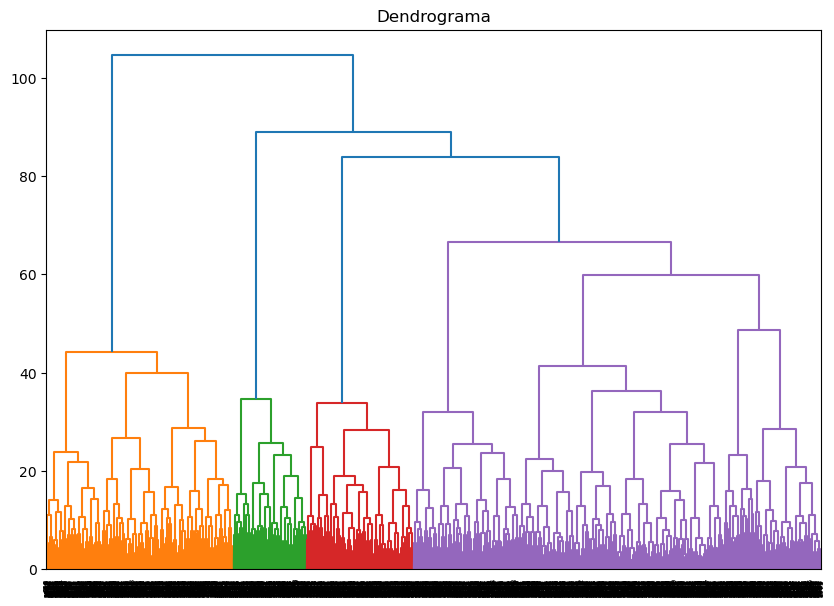

In [74]:
# Calcular la matriz de distancias
linked = linkage(X_scaled, method='ward')

# Trazar el dendrograma
plt.figure(figsize=(10, 7))
dendrogram(linked)
plt.title('Dendrograma')
plt.show()

In [75]:
# Entrenar el modelo K-means con 5 clústeres
kmeans = KMeans(n_clusters=5, random_state=0)
clusters = kmeans.fit_predict(X_scaled)

# Añadir los clústeres al dataset original
gym_data['Cluster'] = clusters
gym_data

c:\Users\Cata Rivera\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn,Cluster
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0,1
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0,0
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0,3
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,0,0
4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,1,1,1,0,1,12,0,33,2.406023,12.0,8,2.284497,2.349070,0,0
3996,0,1,0,0,1,1,1,29,68.883764,1.0,1,1.277168,0.292859,1,3
3997,1,1,1,1,1,12,0,28,78.250542,11.0,2,2.786146,2.831439,0,0
3998,0,1,1,1,1,6,0,32,61.912657,5.0,3,1.630108,1.596237,0,0


In [76]:
# Obtener valores medios por clúster
cluster_means = gym_data.groupby('Cluster').mean()
cluster_means

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
Cluster,,,,,,,,,,,,,,
0,0.502970,0.959406,0.783168,0.574257,1.000000,10.889109,0.542574,29.982178,160.761016,9.954455,4.736634,1.982055,1.974789,0.027723
1,0.522078,0.862338,0.470130,0.306494,0.000000,4.787013,0.425974,29.301299,143.957664,4.475325,3.924675,1.847220,1.716369,0.267532
2,0.495050,0.000000,0.463366,0.079208,1.000000,2.352475,0.215842,28.477228,135.457501,2.198020,2.809901,1.660461,1.477324,0.443564
3,0.485737,1.000000,0.350238,0.240095,1.000000,1.948494,0.341521,28.167987,131.622204,1.856577,2.440571,1.247634,1.012983,0.514263
4,0.559666,0.976134,0.356802,0.230310,0.998807,2.669451,0.473747,30.125298,161.657905,2.459427,4.898568,2.852002,2.850161,0.068019


c:\Users\Cata Rivera\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Cata Rivera\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Cata Rivera\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Cata Rivera\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values

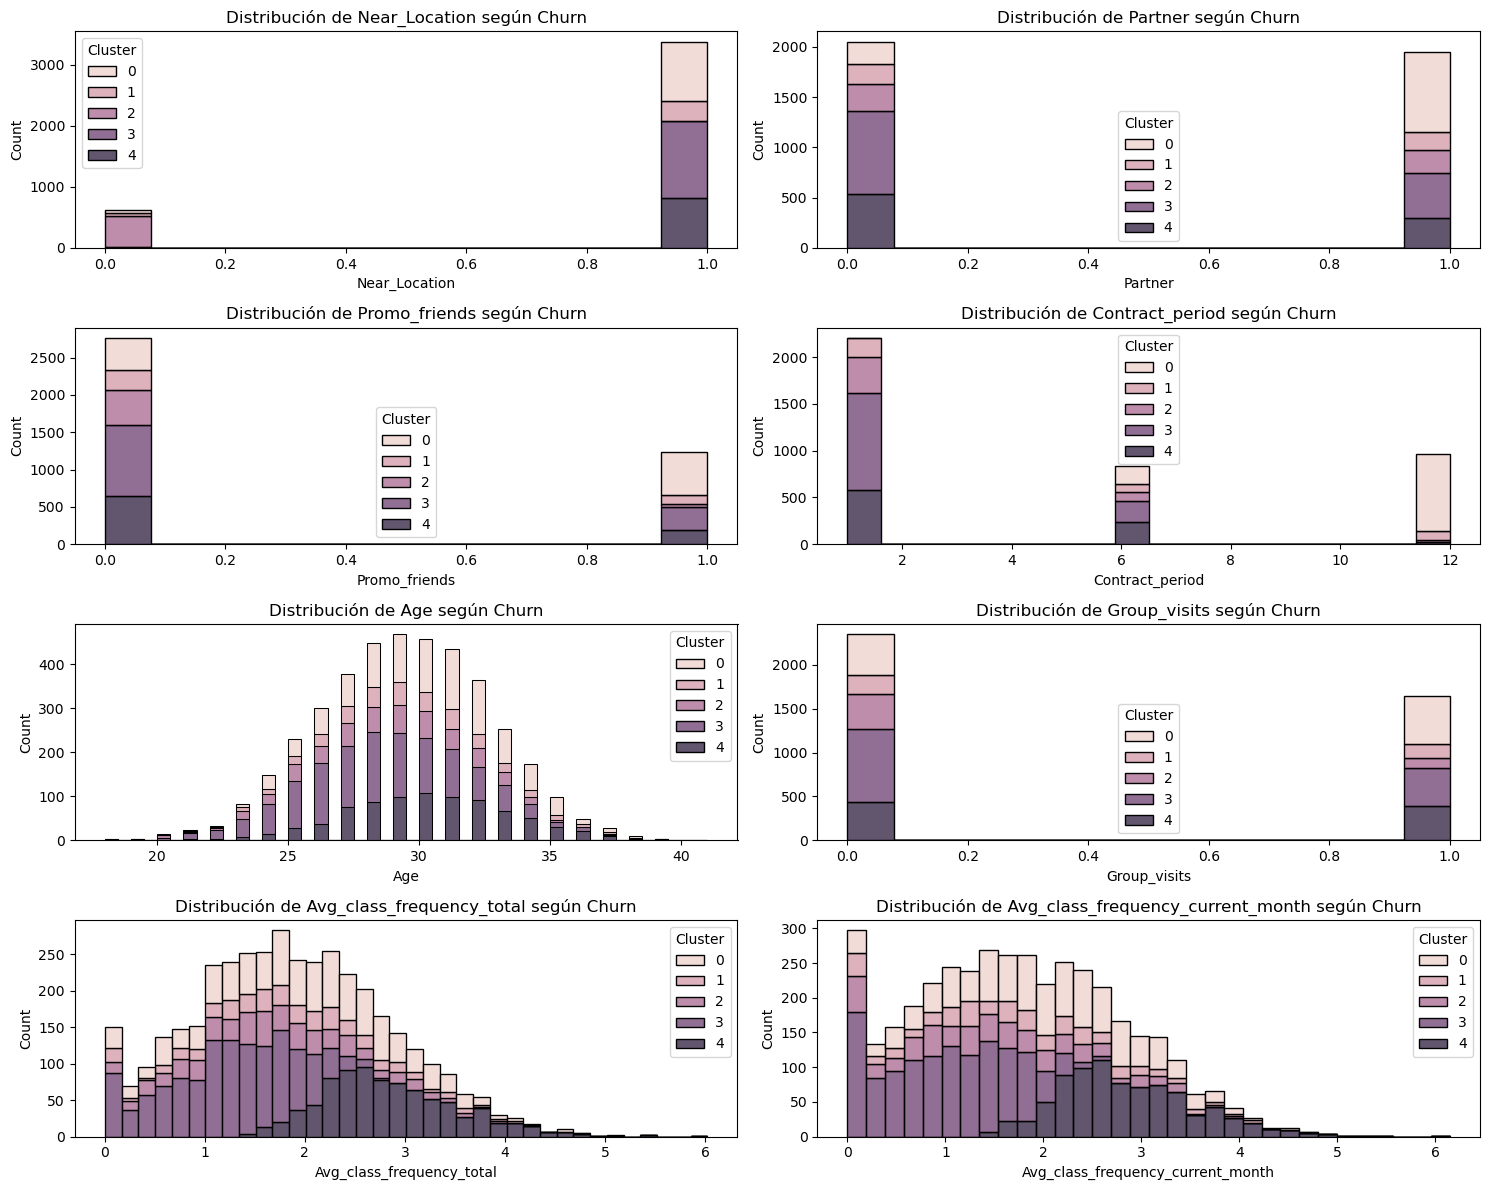

In [77]:
#distrubuciones 
plt.figure(figsize=(15, 12))

# Crear gráficos para algunas de las características importantes
variables_plot = ['Near_Location', 'Partner', 'Promo_friends', 'Contract_period', 'Age', 'Group_visits', 
                     'Avg_class_frequency_total', 'Avg_class_frequency_current_month']

for i, variable in enumerate(variables_plot, 1):
    plt.subplot(4, 2, i)
    sns.histplot(data=gym_data, x=variable, hue='Cluster', multiple='stack', kde=False)
    plt.title(f'Distribución de {variable} según Churn')

plt.tight_layout()
plt.show()

El cluster 0 es el más leal seguido del cluster 4. El cluster con más tasa de cancelacion es el 3, seguido del 2. 

El cluster 0 es el que registra menor tasa de cancelación (solo 2% desertan), algunas de sus características son: 95% de ellos viven o trabajan cerca del gimnasio y el 78% trabajan en una empresa asociada. Más de la mitad de ellos ingresaron al programa a través de un amigo, además son los que más visitas registran y sus contratos son más largos. 

El cluster con mayor tasa de cancelación corresponde al número 3 (51,4% desertan) algunas de sus características son: Si bien viven o trabajan cerca del gimnasio, solamente el 35% pertenece a una empresa asociada. Un 25% ingresa a través de una promo de amigos y su característica más importante es que los contratos que realizan son cortos y las visitas registradas semanales y mensuales son muy pocas. 

In [78]:
# Calcular la tasa de cancelación por clúster
cluster_churn_rate = gym_data.groupby('Cluster')['Churn'].mean().reset_index()
cluster_churn_rate.sort_values(by='Churn', ascending=False)

,Cluster,Churn
3,3,0.514263
2,2,0.443564
1,1,0.267532
4,4,0.068019
0,0,0.027723


### ETAPA 5: Recomendaciones y Conclusiones 

### Conclusiones Generales del Análisis Estadístico:

* Los usuarios que tienen contratos cortos (1 mes) o poco tiempo de vida como clientes (Lifetime) son más propensos a cancelar.
* Baja frecuencia de visitas, tanto en términos de promedio general como en el mes actual, está fuertemente correlacionada con la cancelación. Los usuarios que no participan regularmente tienden a abandonar.
* La participación en visitas grupales parece estar relacionada con una mayor retención. Los clientes que asisten a clases grupales tienen mayor tendencia a quedarse, posiblemente porque disfrutan más de la experiencia social.
* Las personas que gastan más dinero en servicios adicionales (cafetería, productos deportivos, etc.) suelen ser clientes más leales.
* Los usuarios que se inscribieron a través de una oferta con amigos o que trabajan para empresas asociadas también muestran menor tendencia a cancelar.

### Conclusiones Modelo de Predicción de Cancelación de Clientes:

* El modelo de Bosque Aleatorio ha mostrado consistentemente mejores resultados en métricas clave (accuracy, precision, y recall). Por lo tanto, parece ser más adecuado para predecir la cancelación de clientes.

### Conclusiones Segmentación de Clientes:

* Los clusters obtenidos muestran diferencias notables en el comportamiento. Algunos grupos de clientes tienen una alta tasa de cancelación, mientras que otros son más leales.
* Usuarios con contratos de 1 mes y aquellos con baja frecuencia de visitas forman clusters con una mayor probabilidad de cancelación.
* Usuarios jóvenes con poca antigüedad en el gimnasio tienden a abandonar con mayor frecuencia.
* Clientes de empresas asociadas, o aquellos que viven cerca del gimnasio, tienen tasas de retención más altas.
* El cluster 0 es el más leal (solo 2% desertan), algunas de sus características son: 95% de ellos viven o trabajan cerca del gimnasio y el 78% trabajan en una empresa asociada. Más de la mitad de ellos ingresaron al programa a través de un amigo, además son los que más visitas registran y sus contratos son más largos. 
* El cluster con mayor tasa de cancelación corresponde al número 3 (51,4% desertan) algunas de sus características son: Si bien viven o trabajan cerca del gimnasio, solamente el 35% pertenece a una empresa asociada. Un 25% ingresa a través de una promo de amigos y su característica más importante es que los contratos que realizan son cortos y las visitas registradas semanales y mensuales son muy pocas. 

Con base en las características de los clústeres es posible identificar a los usuarios más propensos a cancelar y diseñar estrategias específicas para retenerlos:

### Recomendaciones para Reducir la Cancelación:

* Fomentar la Participación en Clases Grupales:Los usuarios que asisten a clases grupales tienden a permanecer más tiempo en el gimnasio. Una estrategia efectiva sería promover más las actividades grupales, como clases de yoga, spinning, o crossfit, especialmente para aquellos clientes que no participan actualmente.
* Ofrecer Incentivos para Contratos de Mayor Duración: Los contratos de un mes están asociados con una mayor tasa de cancelación. Se puede diseñar un esquema de descuentos o beneficios adicionales para clientes que opten por contratos más largos (3, 6 o 12 meses), incentivando su permanencia.
* Monitorear Clientes con Baja Frecuencia de Visitas: Implementar un sistema de alertas que detecte a clientes que han reducido su frecuencia de visitas. Ofrecerles recordatorios personalizados, promociones especiales o sesiones de entrenamiento gratuitas para incentivar su regreso.
* Programas de Fidelización y Gastos Adicionales: Dado que los clientes que gastan más en servicios adicionales tienden a ser más leales, se pueden crear programas de fidelización que premien el uso de estos servicios, como descuentos en cafetería o masajes después de un cierto número de visitas.
* Segmentación y Marketing Personalizado: Usar los clusters de clientes para aplicar marketing personalizado. Por ejemplo, los clientes jóvenes y nuevos, que tienden a cancelar más rápidamente, podrían recibir una atención especial, con seguimiento personalizado y comunicaciones que destaquen los beneficios de permanecer a largo plazo.
*Programas de Referidos con Amigos: Dado que los clientes que se inscriben a través de una promoción con amigos tienden a quedarse más tiempo, se podría expandir este tipo de promociones para captar más clientes leales.
* Mejorar la Experiencia del Cliente Cerca del Fin del Contrato: Los clientes que están cerca del fin de su contrato deben ser incentivados a renovarlo con campañas especiales, como descuentos por renovación temprana o beneficios adicionales.